In [1]:
# connecting to drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install patool # installing the tool to unrar the dataset
!pip install tensorflow.gpu as tf

  Using cached https://files.pythonhosted.org/packages/31/bf/c28971266ca854a64f4b26f07c4112ddd61f30b4d1f18108b954a746f8ea/tensorflow_gpu-2.2.0-cp36-cp36m-manylinux2010_x86_64.whl


In [3]:
# importing important libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import patoolib 
# extracting the dataset 
patoolib.extract_archive('/content/drive/My Drive/X-ray.rar', outdir="/")





patool: Extracting /content/drive/My Drive/X-ray.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/X-ray.rar"
patool:     with cwd='/'
patool: ... /content/drive/My Drive/X-ray.rar extracted to `/'.


'/'

In [5]:
import os
# setting the path for each class into variables
covid_dir = os.path.join('/xdata/COVID')
normal_dir = os.path.join('/xdata/NORMAL')
pneumonia_dir = os.path.join('/xdata/PNEUMONIA')

# printing the number of images in each directory
print('total training covid images:', len(os.listdir(covid_dir)))
print('total training normal images:', len(os.listdir(normal_dir)))
print('total training pneumonia images:', len(os.listdir(pneumonia_dir)))

# printing the name of images in each directory
rock_files = os.listdir(covid_dir)
print(rock_files[:10])

paper_files = os.listdir(normal_dir)
print(paper_files[:10])

scissors_files = os.listdir(pneumonia_dir)
print(scissors_files[:10])

total training covid images: 4044
total training normal images: 3941
total training pneumonia images: 4273
['aug_31BA3780-2323-493F-8AED-62081B9C383B._PL_4.jpg', 'person1612_virus_2797.jpeg', '90070cbc.jpg', 'person491_virus_997.jpeg', '046.jpeg', 'person1504_virus_2614.jpeg', 'COVID-19 (103).png', 'AR-1.jpg', 'person441_virus_895.jpeg', 'aug_F63AB6CE-1968-4154-A70F-913AF154F53D._avg_1.jpg']
['00002032_006.png', '00003097_003.png', 'NORMAL2-IM-1150-0001.jpeg', '00003248_001.png', 'NORMAL2-IM-0525-0001.jpeg', 'Non-COVID-19 (76).jpg', 'Non-COVID-19 (236).jpeg', 'Non-COVID-19 (182).jpg', '00002860_002.png', 'NORMAL2-IM-0836-0001.jpeg']
['person1439_bacteria_3722.jpeg', 'person1612_virus_2797.jpeg', 'person139_bacteria_663.jpeg', 'person491_virus_997.jpeg', 'person1504_virus_2614.jpeg', 'person441_virus_895.jpeg', 'person51_bacteria_244.jpeg', 'person1030_virus_1722.jpeg', 'person1040_virus_1735.jpeg', 'person514_virus_1031.jpeg']


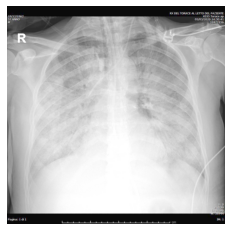

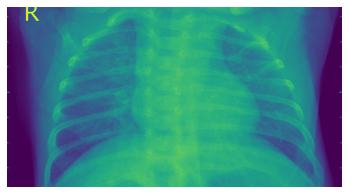

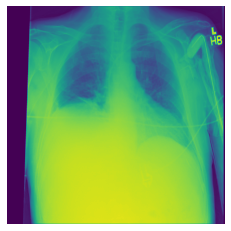

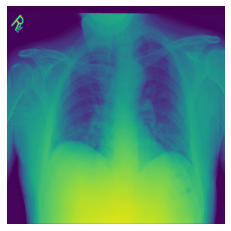

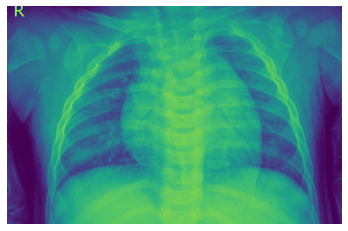

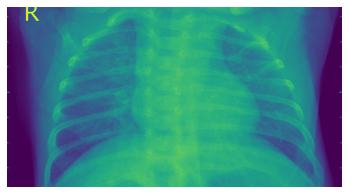

In [6]:
%matplotlib inline
import matplotlib.image as mpimg

pic_index = 2

next_covid = [os.path.join(covid_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
                
next_normal = [os.path.join(normal_dir, fname)  for fname in paper_files[pic_index-2:pic_index]]

next_pneumonia = [os.path.join(pneumonia_dir, fname)   for fname in scissors_files[pic_index-2:pic_index]]

# showing 2 pictures for each class
for i, img_path in enumerate(next_covid+next_normal+next_pneumonia):

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [33]:
# Loading the data from the directory of train and test

TRAINING_DIR = '/xdata/'  # change the name of the unrarred dataset to 'xdata' to use the full sized data as train
train_datagen = ImageDataGenerator( rescale=1.0/255 , samplewise_center=True , samplewise_std_normalization=True) # rescaling the training data only , as it's already modified


# uploading the training data and the training labels from the directory , categorical as we have 3 categories, 
#set the size of images to suite the model, batch size of the images being fed to the model during training 
train_generator = train_datagen.flow_from_directory(
                                              TRAINING_DIR , target_size=(224, 224),  
                                              batch_size=126,
                                              class_mode='categorical') 

# same as training, we use validation to validate our model performance during training and see how it performs

VALIDATION_DIR = "/content/drive/My Drive/datasets/train/"
validation_datagen = ImageDataGenerator( rescale=1.0/255 , samplewise_center=True , samplewise_std_normalization=True)


validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=126
)


# test generator to see how our model performs after training on random images

TEST_DIR = '/content/drive/My Drive/datasets/test/' 
test_datagen = ImageDataGenerator( rescale=1.0/255 , samplewise_center=True , samplewise_std_normalization=True)


# TEST GENERATOR.
test_generator = test_datagen.flow_from_directory(
                                              TEST_DIR , target_size=(224, 224),
                                              class_mode='categorical') 

Found 12251 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 326 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1. 0.]


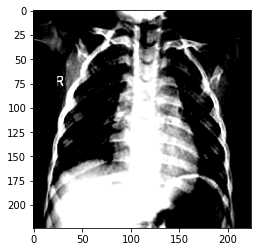

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0.]


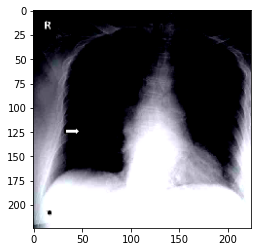

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0.]


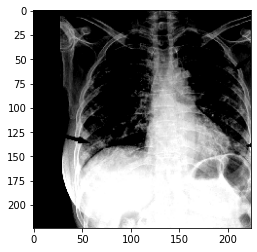

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0.]


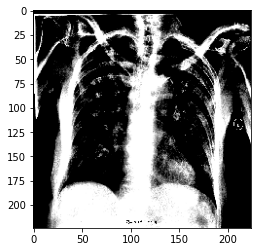

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 1.]


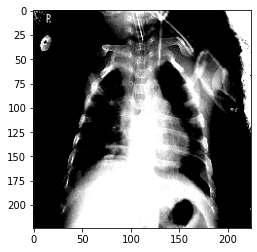

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0.]


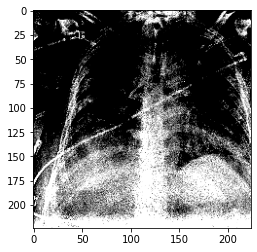

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0.]


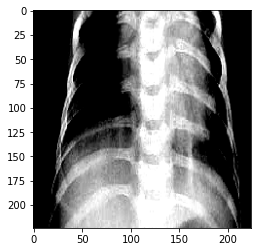

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 1.]


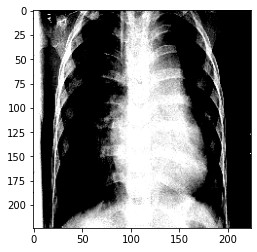

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0.]


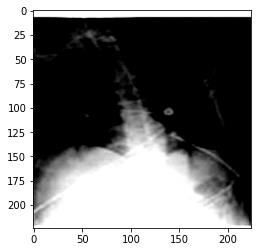

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0.]


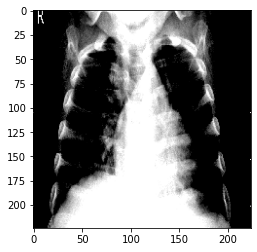

In [9]:
# to visualize the data in the generators

x_batch, y_batch = next(train_generator)  # you can inspect the data in any generator
for i in range (0,10):
    image = x_batch[i]
    plt.imshow(image)
    print(y_batch[i])
    plt.show()

In [10]:
# using the resnet model
from tensorflow.keras.applications import ResNet50
pre_trained_model = ResNet50(input_shape = (224, 224 , 3), include_top = False , pooling='avg' , weights = 'imagenet' ) 
# cutting the top layers to make it work on our new images, setting the pooling to avg as to take the average of output of the model, 
# setting the model weights to imagenet weights as they are  trained on large dataset 

pre_trained_model.trainable = False # to specify that we don't want to train the loaded model 


In [15]:
# creating a new model using the pretrained one as the head of the model and then build our layers under it

model=tf.keras.Sequential([
                           pre_trained_model,
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense( 1028, activation='relu') ,
                           tf.keras.layers.Dropout(0.3) ,
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense( 1028, activation='relu') ,
                           tf.keras.layers.Dropout(0.3) ,
                           tf.keras.layers.Dense( 1028, activation='relu') ,
                           tf.keras.layers.Dropout(0.3) ,
                           tf.keras.layers.Dense(3,  activation='softmax')
])



opt=tf.keras.optimizers.RMSprop( 0.001,momentum=0.9 ) # setting our optimizer to optimize the training performance 

model.compile(optimizer='adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'] ) # compiling our model and setting our loss function and metrics 
# we set the loss as categorical as we have categorical problem not binary

model.summary() # printing the summary of the model

# setting a callback for the model, which makes the model save it's weights each epoch while training, and only save the best model depending on the validation loss
cb=tf.keras.callbacks.ModelCheckpoint(
                                      f'checkpoint_test' , monitor='val_loss', verbose=0, save_best_only=True,
                                      save_weights_only=False, mode='auto', save_freq='epoch' )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization_4 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_8 (Dense)              (None, 1028)              2106372   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1028)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1028)              4112      
_________________________________________________________________
dense_9 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1028)             

In [16]:
history = model.fit(train_generator, validation_data= test_generator ,
                    epochs =1, shuffle=True, workers=-1,
                    verbose = 1,callbacks=cb)
'''history = model.fit(
              x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
                  validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
                  sample_weight=None, initial_epoch=0, steps_per_epoch=None,
                  validation_steps=None, validation_batch_size=None, validation_freq=1,
                  max_queue_size=10, workers=1, use_multiprocessing=False )'''

Epoch 1/25
98/98 [==============================] - ETA: 0s - loss: 0.7859 - accuracy: 0.6822WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: checkpoint_test/assets
98/98 [==============================] - 497s 5s/step - loss: 0.7859 - accuracy: 0.6822 - val_loss: 0.8232 - val_accuracy: 0.6288
Epoch 2/25
98/98 [==============================] - 284s 3s/step - loss: 0.5606 - accuracy: 0.7608 - val_loss: 0.5774 - val_accuracy: 0.8221
Epoch 3/25
98/98 [==============================] - 289s 3s/step - loss: 0.5099 - accuracy: 0.7799 - val_loss: 0.3837 - val_accuracy: 0.9233
Epoch 4/25
98/98 [==============================] - 250s 3s/step - loss: 0.4905 

'history = model.fit(\n              x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,\n                  validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,\n                  sample_weight=None, initial_epoch=0, steps_per_epoch=None,\n                  validation_steps=None, validation_batch_size=None, validation_freq=1,\n                  max_queue_size=10, workers=1, use_multiprocessing=False )'

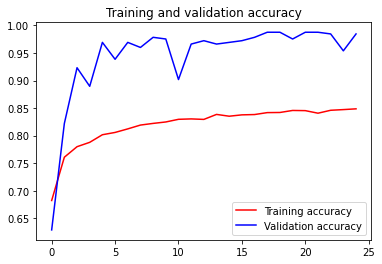

<Figure size 432x288 with 0 Axes>

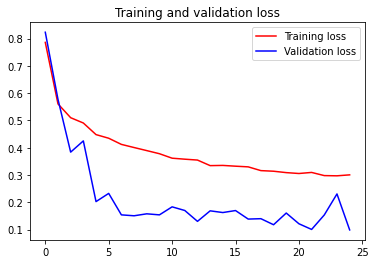

<Figure size 432x288 with 0 Axes>

In [17]:
# plotting accuracy and loss 
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [18]:
# saving the model to this directory
export_dir='model_ResNet50_RMSprop_normalized_images'
tf.saved_model.save( model , export_dir)

INFO:tensorflow:Assets written to: model_ResNet50_RMSprop_normalized_images/assets


In [23]:
!zip -r model_ResNet50_RMSprop_normalized_images.zip 'model_ResNet50_RMSprop_normalized_images'
from google.colab import files
files.download('model_ResNet50_RMSprop_normalized_images.zip')

# to download the model as zip file 

  adding: model_ResNet50_RMSprop_normalized_images/ (stored 0%)
  adding: model_ResNet50_RMSprop_normalized_images/saved_model.pb (deflated 92%)
  adding: model_ResNet50_RMSprop_normalized_images/variables/ (stored 0%)
  adding: model_ResNet50_RMSprop_normalized_images/variables/variables.data-00000-of-00002 (deflated 82%)
  adding: model_ResNet50_RMSprop_normalized_images/variables/variables.data-00001-of-00002 (deflated 8%)
  adding: model_ResNet50_RMSprop_normalized_images/variables/variables.index (deflated 79%)
  adding: model_ResNet50_RMSprop_normalized_images/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# LOADING THE MODEL
history=tf.keras.models.load_model('model_ResNet50_RMSprop_normalized_images')
history.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization_4 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_8 (Dense)              (None, 1028)              2106372   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1028)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1028)              4112      
_________________________________________________________________
dense_9 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1028)             

In [25]:
# another loss and accuracy plotting
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

TypeError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction = Normal
folder= pnuemenia


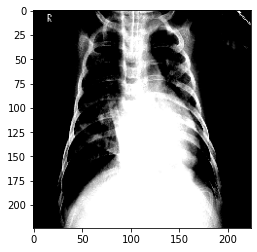

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction = Covid
folder= covid


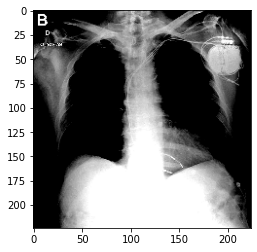

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction = Normal
folder= pnuemenia


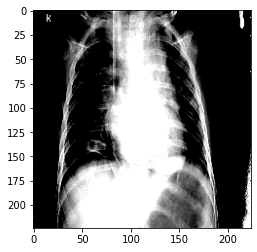

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction = Covid
folder= covid


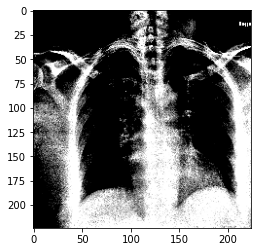

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction = Covid
folder= covid


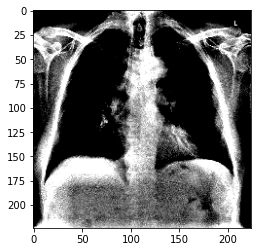

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction = Normal
folder= pnuemenia


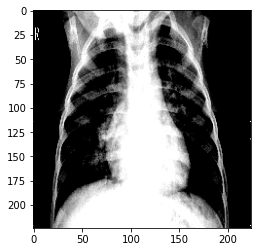

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction = Normal
folder= normal


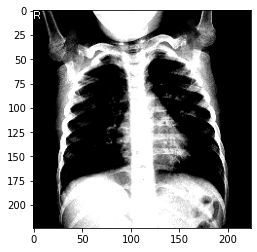

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction = Normal
folder= normal


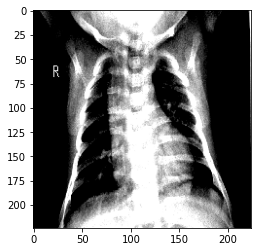

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction = Pnumenia
folder= normal


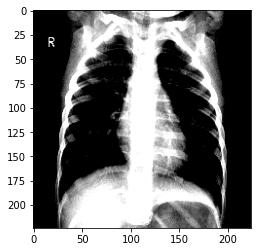

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction = Pnumenia
folder= pnuemenia


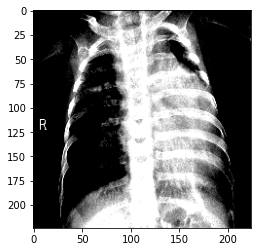

In [26]:
# making predictions on images the model was not trained on

# to visualize the data in the generators
predicted_label = np.argmax(history.predict( test_generator ),axis=1)
labels={0:'Covid' , 1:'Normal' , 2:'Pnumenia'}
pred= [labels[x] for x in predicted_label]

x_batch, y_batch = next(test_generator) 
for i in range (0,10):
    image = x_batch[i]
    plt.imshow(image)
    print('prediction =', pred[i])
    if y_batch[i][0] == 1: print('folder= covid')
    elif y_batch[i][1] == 1: print('folder= normal')
    elif y_batch[i][2] == 1: print('folder= pnuemenia')
    plt.show()


     

In [48]:
history.evaluate(validation_generator)

3/3 [==============================] - 4s 1s/step - loss: 0.1185 - accuracy: 0.9889


[0.11848904192447662, 0.9888888597488403]